# Stac installation, and a short guide

Stac is a python package. It has a number of dependencies, the most important of which are

* qiskit
* stim
* a working latex installation [if you want pretty latex figures]

To install stac, please run the following cell

In [ ]:
!pip install git+https://github.com/abdullahkhalids/stac

If you don't have git installed, you can alos just download the repository directly, and run `!pip install /path/to/repo/dir`.

# Testing the installation

The following commands show you how to create a quantum code. You will understand what they mean as you read the book. Right now, just make sure the commands work.

In [2]:
import stac
cd = stac.CommonCodes.generate_code("[[7,1,3]]")
cd.generator_matrix

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]])

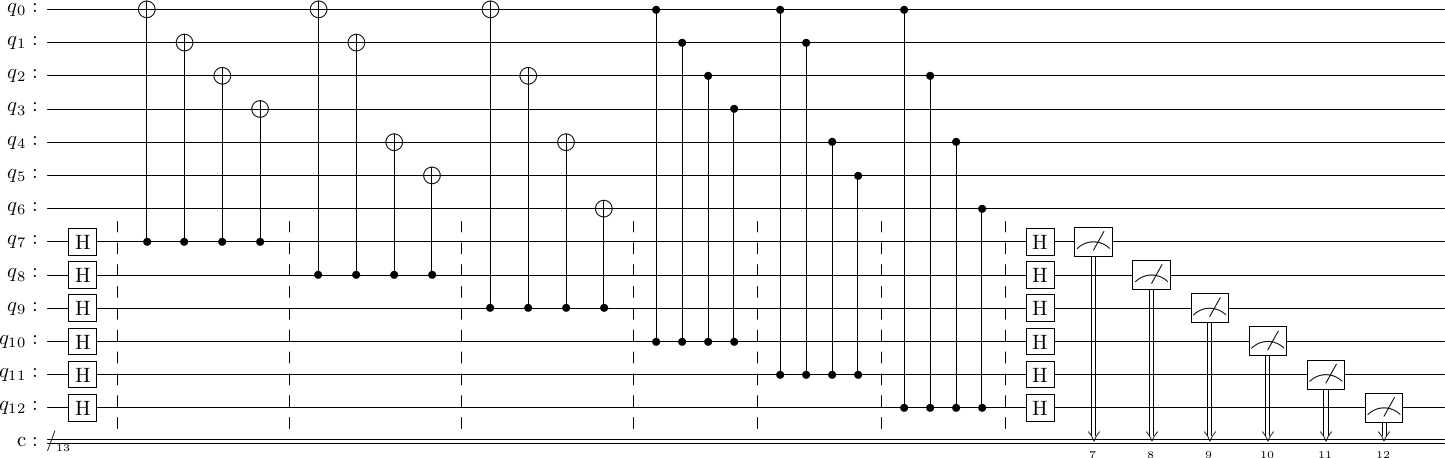

In [3]:
circ = cd.construct_syndrome_circuit()
circ.draw()
# if this fails, you likely don't have latex.
# try
# circ.draw(output='mpl')
# behind the scenes stac using qiskit to draw circuits

In [4]:
# stac uses qiskit to simulate circuits
# if this fails, qiskit is not properly installed
circ.simulate()

        basis    amplitude
-------------  -----------
0000000111000        0.354
1111000111000       -0.354
1100110111000       -0.354
0011110111000        0.354
1010101111000       -0.354
0101101111000        0.354
0110011111000        0.354
1001011111000       -0.354


In [5]:
# it uses stim to sample from circuits
# if this fails, stim is not properly installed
circ.sample()

[1 0 1 0 0 0]


If the above commands work, then stac is properly installed on your machine.

## A guide to stac quantum circuits
Stac allows you to create quantum circuits. Here is a short guide on the syntax stac uses.

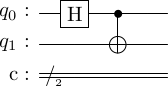

In [6]:
import stac
# create circuit object.
# you don't have to specify the number of qubits or classical bits
circ = stac.Circuit()
# operations are added with the append method
circ.append('H', 0)
circ.append('CX', 0, 1)

# you can draw the circuit using the draw method
circ.draw()

In [7]:
# you can simulate a circuit using qiskit's statevector simulator like so
# this will present the output state in a nice readable form
circ.simulate()

  basis    amplitude
-------  -----------
     00        0.707
     11        0.707


In [8]:
# or you can use stim https://github.com/quantumlib/Stim/
# to sample from the circuit

# first add measurements to the circuit
circ.append('M', 0)
circ.append('M', 1)
# then sample 10 times
circ.sample(10)

[0 0]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[1 1]
[1 1]
[0 0]
